<div style="text-align: center;">
    <h1>PROJECT P8
    <h1><b>Patient Preferences Studies Categorization System</b></h1>
    <p>Francesco Giuseppe Gillio</p>
    <p>César Augusto Seminario Yrigoyen</p>
    <h3><b>Applied Data Science Project</b></h3>
</div>

<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/it/4/47/Logo_PoliTo_dal_2021_blu.png" width="500">
</div>

https://github.com/adsp-polito/2024-P8-PPS

# **set-up**

In [1]:
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
main = '/content/drive/MyDrive/embedding-models'
if not os.path.exists(main):
    os.makedirs(main)

In [4]:
branch = os.path.join('/content/drive/MyDrive/embedding-models', 'data-charts')
if not os.path.exists(branch):
    os.makedirs(branch)

branch = os.path.join('/content/drive/MyDrive/embedding-models', 'google')
if not os.path.exists(branch):
    os.makedirs(branch)

branch = os.path.join('/content/drive/MyDrive/embedding-models', 'sentence-transformers')
if not os.path.exists(branch):
    os.makedirs(branch)

branch = os.path.join('/content/drive/MyDrive/embedding-models', 'classification-outputs')
if not os.path.exists(branch):
    os.makedirs(branch)

In [5]:
import warnings
warnings.filterwarnings('ignore')

# **data-exploration**

In [6]:
import numpy as np
import pandas as pd

**Data Collection**
* **Dataset**: output of a **Pubmed Search String** on **Patient Preferences Studies**
* **URL**: https://raw.githubusercontent.com/adsp-polito/2024-P8-PPS/refs/heads/main/input-data/articles-2023.csv

In [7]:
raw = 'https://raw.githubusercontent.com/adsp-polito/2024-P8-PPS/refs/heads/main/input-data/articles-2023.csv'
data = pd.read_csv(raw)
data.head()

,Title,Authors,Abstract,Published Year,Published Month,Journal,Volume,Issue,Pages,Accession Number,DOI,Ref,Covidence #,Study,Notes,Tags,Label
0,Preferences for disease-related information an...,de Hosson M; De Groote K; Wynendaele H; Mosque...,PURPOSE: The transition towards adult-focused ...,2023,Sep,Eur J Pediatr,182,9,3917-3927,NaN,10.1007/s00431-023-05020-1,37351648,#930,deHosson 2023,NaN,NaN,0
1,Advance Care Planning in South Korea.,Kim YJ; Kim SH,South Korea is an Asian country with a very lo...,2023,Aug,Z Evid Fortbild Qual Gesundhwes,180,NaN,68-73,NaN,10.1016/j.zefq.2023.04.014,37353427,#1010,Kim 2023,NaN,NaN,0
2,Stakeholders' preferences for the design and d...,Vo LK; Allen MJ; Cunich M; Thillainadesan J; M...,This systematic review aimed to synthesise evi...,2024,Jan,Soc Sci Med,340,NaN,116459,NaN,10.1016/j.socscimed.2023.116459,38048738,#513,Vo 2024,NaN,NaN,1
3,Discrete Choice Experiments in Health State Va...,Wang H; Rowen DL; Brazier JE; Jiang L,BACKGROUND: Discrete choice experiments (DCEs)...,2023,May,Appl Health Econ Health Policy,21,3,405-418,NaN,10.1007/s40258-023-00794-9,36997744,#1276,Wang 2023,NaN,NaN,1
4,Improving methods of clinical practice guideli...,Djulbegovic B; Hozo I; Cuker A; Guyatt G,BACKGROUND: Current methods for developing cli...,2023,Dec,J Eval Clin Pract,NaN,NaN,NaN,NaN,10.1111/jep.13953,38073027,#573,Djulbegovic 2023,NaN,NaN,0


**Data Exploration**

1. Extract relevant features from the dataset: **Title, Abstract & Label**

In [8]:
data = data[['Title', 'Abstract', 'Label']]
data.head()

,Title,Abstract,Label
0,Preferences for disease-related information an...,PURPOSE: The transition towards adult-focused ...,0
1,Advance Care Planning in South Korea.,South Korea is an Asian country with a very lo...,0
2,Stakeholders' preferences for the design and d...,This systematic review aimed to synthesise evi...,1
3,Discrete Choice Experiments in Health State Va...,BACKGROUND: Discrete choice experiments (DCEs)...,1
4,Improving methods of clinical practice guideli...,BACKGROUND: Current methods for developing cli...,0


2. Assess the **Title Average Length** and the **Abstract Average Lenght** (Word Count)

In [9]:
data['title-length'] = data['Title'].astype(str).apply(lambda x: len(x.split()))
data['abstract-length'] = data['Abstract'].astype(str).apply(lambda x: len(x.split()))

print(f"Title Average Length (Word Count): {data['title-length'].mean():.2f} words")
print(f"Abstract Average Lenght (Word Count): {data['abstract-length'].mean():.2f} words")

Title Average Length (Word Count): 15.16 words
Abstract Average Lenght (Word Count): 256.62 words


3. Detect **NaN** values in the dataset

In [10]:
print(f"Titles: {data['Title'].isna().sum()}")
print(f"Abstracts: {data['Abstract'].isna().sum()}")

Titles: 0
Abstracts: 44


In [11]:
data['Title'] = data['Title'].fillna('')
data['Abstract'] = data['Abstract'].fillna('')

data.reset_index(drop=True, inplace=True)

data = data[['Title', 'Abstract', 'Label', 'title-length', 'abstract-length']]

data.head()

,Title,Abstract,Label,title-length,abstract-length
0,Preferences for disease-related information an...,PURPOSE: The transition towards adult-focused ...,0,18,346
1,Advance Care Planning in South Korea.,South Korea is an Asian country with a very lo...,0,6,199
2,Stakeholders' preferences for the design and d...,This systematic review aimed to synthesise evi...,1,18,300
3,Discrete Choice Experiments in Health State Va...,BACKGROUND: Discrete choice experiments (DCEs)...,1,15,357
4,Improving methods of clinical practice guideli...,BACKGROUND: Current methods for developing cli...,0,21,225


4. Detect **Outliers** in the dataset (rows with **Abstract Length** out of bound)

In [12]:
threshold = 1.5 * data['abstract-length'].mean()

data['deviation'] = (data['abstract-length'] - data['abstract-length'].mean()) / data['abstract-length'].mean()

outliers = data[(data['abstract-length'] > threshold)]

print(f"Outliers (Count): {len(outliers)}")

Outliers (Count): 77


In [13]:
outliers.head()

,Title,Abstract,Label,title-length,abstract-length,deviation
31,Prospective Six-Month Analysis of Multiarea Bu...,INTRODUCTION: DeRidder burst spinal cord stimu...,0,18,450,0.753545
52,Obesity Management in Adults: A Review.,IMPORTANCE: Obesity affects approximately 42% ...,0,6,522,1.034112
59,A Smartphone-Gamified Virtual Reality Exposure...,"BACKGROUND: To the best of our knowledge, no s...",0,15,414,0.613261
93,Understanding patient cost-sharing thresholds ...,BACKGROUND: The process used to prefer certain...,1,13,388,0.511945
99,Which body functions and activities matter for...,"BACKGROUND: Stroke is a common, serious, and d...",1,27,395,0.539223


5. Assess the **Label Distribution** of the dataset

In [14]:
counts = data['Label'].value_counts()
print("Label Distribution:")
print(counts)

Label Distribution:
Label
0    986
1    229
Name: count, dtype: int64


# **data-visualization**

In [15]:
import numpy as np
import pandas as pd

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

unito = "#EE1A39"
polito = "#002A5C"

1. **Title Length Distribution**

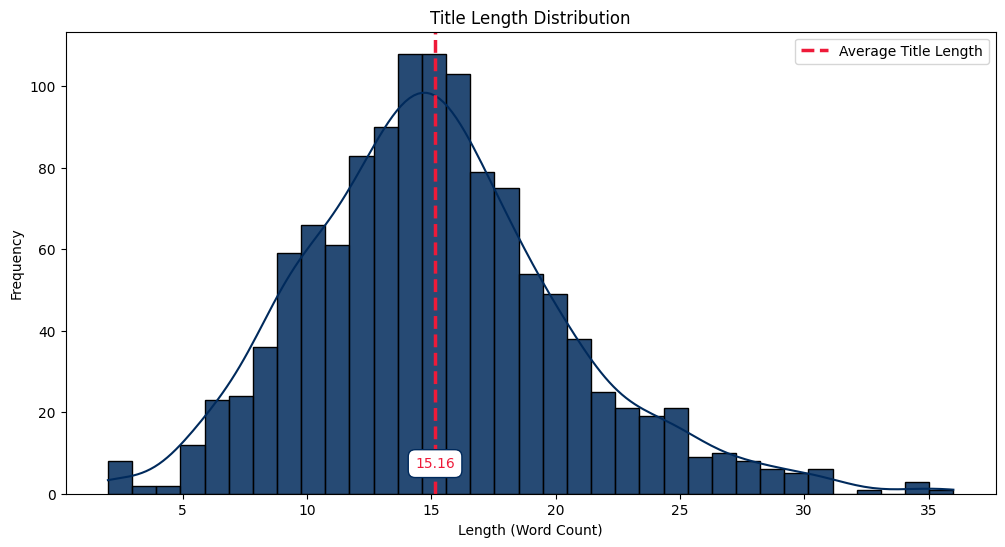

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(data['title-length'],
             kde=True,
             color=polito,
             bins=35,
             alpha=0.85)

plt.axvline(data['title-length'].mean(),
            color=unito,
            linestyle='dashed',
            linewidth=2.5,
            label='Average Title Length')

mean = data['title-length'].mean()
plt.text(mean,
         plt.gca().get_ylim()[1] * 0.05,
         f'{mean:.2f}',
         color=unito,
         fontsize=10,
         ha='center',
         va='bottom',
         bbox=dict(facecolor='white',
                   edgecolor=polito,
                   boxstyle='round,pad=0.5'))

plt.title('Title Length Distribution')
plt.xlabel('Length (Word Count)')
plt.ylabel('Frequency')
plt.legend()

plt.savefig('/content/drive/MyDrive/embedding-models/data-charts/title-length-distribution.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

* **Store** into `/content/drive/MyDrive/embedding-models/data-charts/title-length-distribution.png`

In [18]:
plt.close()

2. **Abstract Length Distribution**

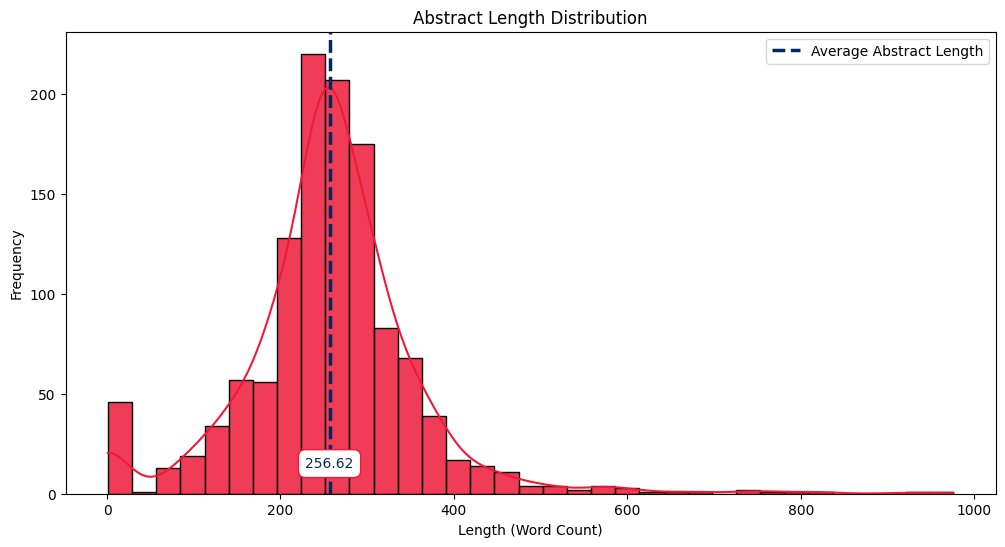

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(data['abstract-length'],
             kde=True,
             color=unito,
             bins=35,
             alpha=0.85)

mean = data['abstract-length'].mean()
plt.axvline(mean,
            color=polito,
            linestyle='dashed',
            linewidth=2.5,
            label='Average Abstract Length')

plt.text(mean,
         plt.gca().get_ylim()[1] * 0.05,
         f'{mean:.2f}',
         color=polito,
         fontsize=10,
         ha='center',
         va='bottom',
         bbox=dict(facecolor='white',
                   edgecolor=unito,
                   boxstyle='round,pad=0.5'))

plt.title('Abstract Length Distribution')
plt.xlabel('Length (Word Count)')
plt.ylabel('Frequency')
plt.legend()

plt.savefig('/content/drive/MyDrive/embedding-models/data-charts/abstract-length-distribution.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

* **Store** into `/content/drive/MyDrive/embedding-models/data-charts/abstract-length-distribution.png`

In [20]:
plt.close()

3. **Title Length Boxplot**

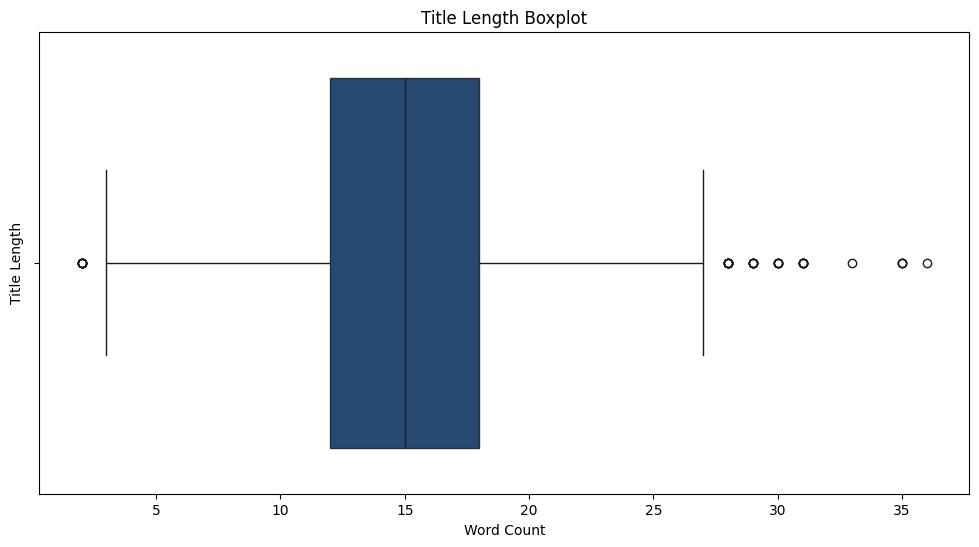

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data['title-length'].values,
    orient="h",
    color=polito,
    boxprops=dict(facecolor=polito,
                  alpha=0.85)
)
plt.title("Title Length Boxplot")
plt.xlabel("Word Count")
plt.ylabel("Title Length")

plt.savefig('/content/drive/MyDrive/embedding-models/data-charts/title-length-boxplot.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

* **Store** into `/content/drive/MyDrive/embedding-models/data-charts/title-length-boxplot.png`

In [22]:
plt.close()

4. **Abstract Length Boxplot**

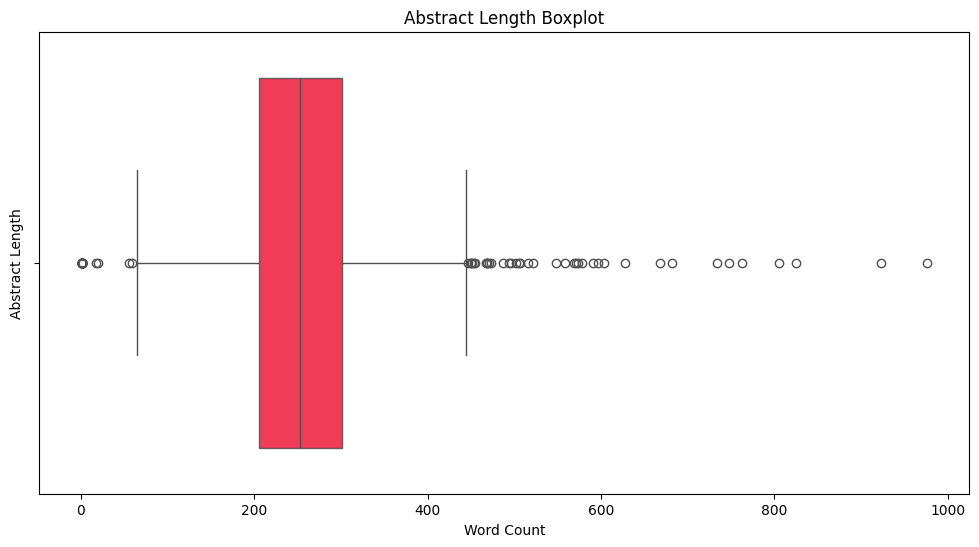

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data['abstract-length'].values,
    orient="h",
    color=unito,
    boxprops=dict(facecolor=unito,
                  alpha=0.85)
)
plt.title("Abstract Length Boxplot")
plt.xlabel("Word Count")
plt.ylabel("Abstract Length")

plt.savefig('/content/drive/MyDrive/embedding-models/data-charts/abstract-length-boxplot.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

* **Store** into `/content/drive/MyDrive/embedding-models/data-charts/abstract-length-boxplot.png`

In [24]:
plt.close()

5. **Label Distribution**

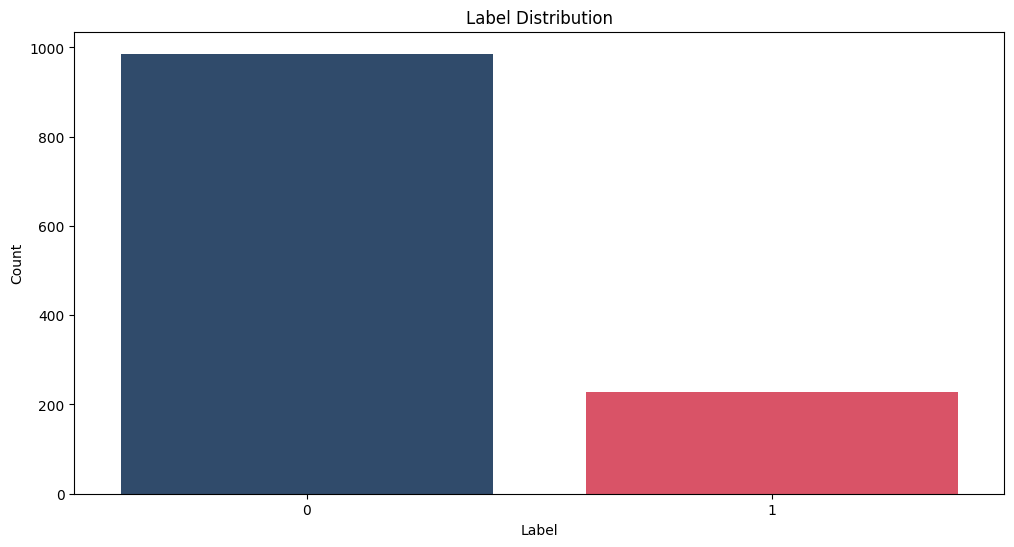

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=counts.index,
    y=counts.values,
    palette=[polito, unito],
    alpha=0.85
)
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")

plt.savefig('/content/drive/MyDrive/embedding-models/data-charts/label-distribution.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

* **Store** into `/content/drive/MyDrive/embedding-models/data-charts/label-distribution.png`

In [26]:
plt.close()

6. **Outliers Scatter Plot**

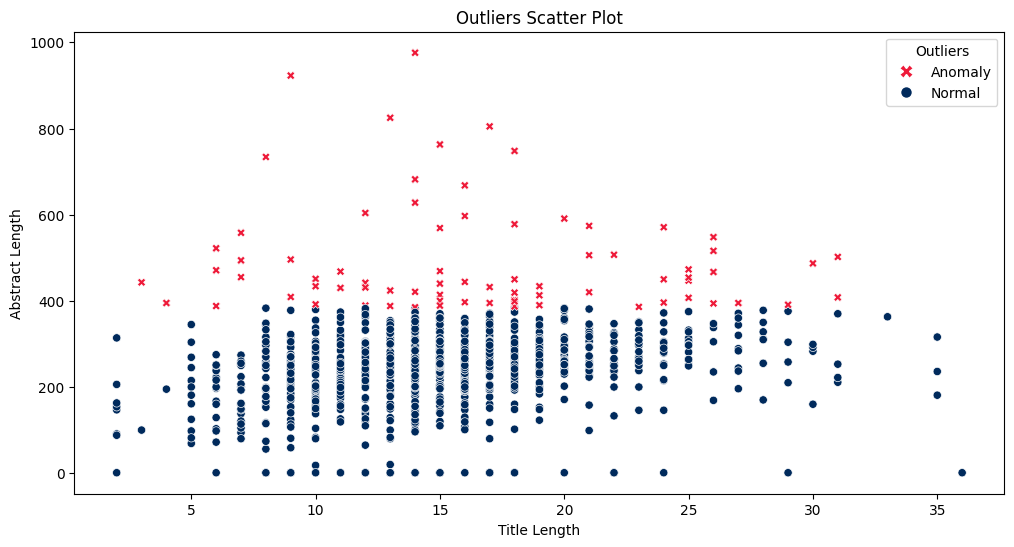

In [27]:
import matplotlib.lines as mlines

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=data,
    x='title-length',
    y='abstract-length',
    hue=(data.index.isin(outliers.index)),
    palette={True: unito,
             False: polito},
    style=(data.index.isin(outliers.index)),
    markers={True: 'X',
             False: 'o'},
    legend='full',
)

legend_handles = [
    mlines.Line2D([], [],
                  marker='X',
                  color='w',
                  markerfacecolor=unito,
                  markersize=10,
                  label="Anomaly"),
    mlines.Line2D([], [],
                  marker='o',
                  color='w',
                  markerfacecolor=polito,
                  markersize=8.5,
                  label="Normal")
]

plt.title("Outliers Scatter Plot")
plt.xlabel("Title Length")
plt.ylabel("Abstract Length")

plt.legend(handles=legend_handles,
           title="Outliers")

plt.savefig('/content/drive/MyDrive/embedding-models/data-charts/outliers-scatterplot.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

* **Store** into `/content/drive/MyDrive/embedding-models/data-charts/outliers-scatterplot.png`

In [28]:
plt.close()

# **data-preprocessing**

In [29]:
import numpy as np
import pandas as pd

**Data Collection**
* **Dataset**: output of a **Pubmed Search String** on **Patient Preferences Studies**
* **URL**: https://raw.githubusercontent.com/adsp-polito/2024-P8-PPS/refs/heads/main/input-data/articles-2023.csv

In [30]:
raw = 'https://raw.githubusercontent.com/adsp-polito/2024-P8-PPS/refs/heads/main/input-data/articles-2023.csv'
data = pd.read_csv(raw)

In [31]:
data = data[['Title', 'Abstract', 'Label']]

* Filter out **NaN** values

In [32]:
data = data.fillna("")

**Sentence Embedding Function**

In [33]:
import torch
from sentence_transformers import SentenceTransformer

In [34]:
def encode(title, abstract, model, tokenizer, device, mask, case):
    """
    encode title and abstract via pre-trained input model

    args:
        title (str): document title
        abstract (str): document abstract
        model: pre-trained model
        device: device ('cuda' or 'cpu')
        case (int): title + abstract case (1-5)
        mask (bool):
            True: outputs.pooler_output
            False: outputs.last_hidden_state[:, 0, :]

    returns:
        numpy.ndarray: title + abstract embedding
    """

    def base(sentence, model, tokenizer, device, mask):
        """
        encode a sentence via pre-trained input bert-base model (BERT & BigBird)

        args:
            sentence (str): sentence to encode
            model: pre-trained bert-base model
            tokenizer: bert-base tokenizer
            device: device ('cuda' or 'cpu')
            mask (bool):
                True: outputs.pooler_output
                False: outputs.last_hidden_state[:, 0, :]

        returns:
            numpy.ndarray: sentence embedding ([CLS] token)
        """
        # tokenize the input sentence
        inputs = tokenizer(
            sentence,
            return_tensors="pt",
            truncation=True,  # truncates sentences longer than 512 tokens
            padding=True,  # pads sentences to the same length in batch processing
            max_length=512
        )

        # inputs to device (GPU or CPU)
        inputs = {key: value.to(device) for key, value in inputs.items()}

        # model to device
        model = model.to(device)

        # pass the input through the model
        with torch.no_grad():
            outputs = model(**inputs, output_attentions=True)

        if mask:
            # post-processed version of the [CLS] token after the pooling layer (tanh activation)
            embedding = outputs.pooler_output  # shape: (batch size, hidden size)
        else:
            # raw version of the [CLS] token from the last hidden layer
            embedding = outputs.last_hidden_state[:, 0, :]  # shape: (batch size, hidden size)

        return embedding.squeeze(0).cpu().numpy()  # move to CPU and convert to numpy

    # case 1: concatenate the title and abstract, and return a single embedding
    if case == 1:
        text = title + ". " + abstract
        if not isinstance(model, SentenceTransformer):
            return base(text, model, tokenizer, device, mask)
        else:
            return model.encode([text], convert_to_numpy=True)[0]

    # case 2: sum the embeddings of the title and abstract
    elif case == 2:
        if not isinstance(model, SentenceTransformer):
            title = base(title, model, tokenizer, device, mask)  # title embedding
            abstract = base(abstract, model, tokenizer, device, mask)  # abstract embedding
        else:
            title = model.encode([title], convert_to_numpy=True)[0]  # title embedding
            abstract = model.encode([abstract], convert_to_numpy=True)[0]  # abstract embedding
        return title + abstract

    # case 3: concatenate the embeddings of the title and abstract
    elif case == 3:
        if not isinstance(model, SentenceTransformer):
            title = base(title, model, tokenizer, device, mask)  # title embedding
            abstract = base(abstract, model, tokenizer, device, mask)  # abstract embedding
        else:
            title = model.encode([title], convert_to_numpy=True)[0]  # title embedding
            abstract = model.encode([abstract], convert_to_numpy=True)[0]  # abstract embedding
        return np.concatenate((title, abstract))

    # case 4: average the embeddings of the title and abstract
    elif case == 4:
        if not isinstance(model, SentenceTransformer):
            title = base(title, model, tokenizer, device, mask)  # title embedding
            abstract = base(abstract, model, tokenizer, device, mask)  # abstract embedding
        else:
            title = model.encode([title], convert_to_numpy=True)[0]  # title embedding
            abstract = model.encode([abstract], convert_to_numpy=True)[0]  # abstract embedding
        return 0.5 * title + 0.5 * abstract

    # case 5: weighted average of the embeddings of the title and abstract (40% title, 60% abstract)
    elif case == 5:
        if not isinstance(model, SentenceTransformer):
            title = base(title, model, tokenizer, device, mask)  # title embedding
            abstract = base(abstract, model, tokenizer, device, mask)  # abstract embedding
        else:
            title = model.encode([title], convert_to_numpy=True)[0]  # title embedding
            abstract = model.encode([abstract], convert_to_numpy=True)[0]  # abstract embedding
        return 0.4 * title + 0.6 * abstract

In [35]:
cases = {
    1: "-text-concatenation",
    2: "-vector-sum",
    3: "-vector-concatenation",
    4: "-vector-average",
    5: "-vector-weighted-average"
}

* **Store** a text file for run logs into `/content/drive/MyDrive/embedding-models/run-logs.txt`

In [36]:
path = '/content/drive/MyDrive/embedding-models/run-logs.txt'

with open(path, 'w') as file:
    pass  # blank text

* Search **NaN** values on the Web

In [37]:
#TODO

# **google/bert-base-uncased**
<img src="https://cdn-thumbnails.huggingface.co/social-thumbnails/models/google-bert/bert-base-uncased.png" width="500">

* Data Collection

In [38]:
import numpy as np
import pandas as pd

In [39]:
raw = 'https://raw.githubusercontent.com/adsp-polito/2024-P8-PPS/refs/heads/main/input-data/articles-2023.csv'
data = pd.read_csv(raw)

In [40]:
data = data[['Title', 'Abstract', 'Label']].fillna("")

* Sentence Embedding

In [41]:
import torch
from transformers import BertTokenizer, BertModel

In [42]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [43]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

**google/bert-base-uncased-mask**
* `mask = True`





In [44]:
import time

In [45]:
for key, value in cases.items():
    start = time.time()
    data['bert-base-uncased-mask' + value] = data.apply(
        lambda x: encode(x['Title'],
                         x['Abstract'],
                         model,
                         tokenizer,
                         device,
                         mask = True,
                         case = key),
        axis=1
    )
    end = time.time()
    total = end - start
    minutes = int(total // 60)
    seconds = int(total % 60)
    log = f"{'bert-base-uncased-mask' + value}: {minutes:02d}:{seconds:02d}"

    with open('/content/drive/MyDrive/embedding-models/run-logs.txt', 'a') as file:
        file.write(log + '\n')

    print(log)

BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


bert-base-uncased-mask-text-concatenation: 00:42
bert-base-uncased-mask-vector-sum: 00:55
bert-base-uncased-mask-vector-concatenation: 00:53
bert-base-uncased-mask-vector-average: 00:54
bert-base-uncased-mask-vector-weighted-average: 00:53


**google/bert-base-uncased-raw**
* `mask = False`


In [46]:
import time

In [47]:
for key, value in cases.items():
    start = time.time()
    data['bert-base-uncased-raw' + value] = data.apply(
        lambda x: encode(x['Title'],
                         x['Abstract'],
                         model,
                         tokenizer,
                         device,
                         mask = False,
                         case = key),
        axis=1
    )
    end = time.time()
    total = end - start
    minutes = int(total // 60)
    seconds = int(total % 60)
    log = f"{'bert-base-uncased-raw' + value}: {minutes:02d}:{seconds:02d}"

    with open('/content/drive/MyDrive/embedding-models/run-logs.txt', 'a') as file:
        file.write(log + '\n')

    print(log)

bert-base-uncased-raw-text-concatenation: 00:41
bert-base-uncased-raw-vector-sum: 00:52
bert-base-uncased-raw-vector-concatenation: 00:54
bert-base-uncased-raw-vector-average: 00:53
bert-base-uncased-raw-vector-weighted-average: 00:53


In [48]:
data.head()

,Title,Abstract,Label,bert-base-uncased-mask-text-concatenation,bert-base-uncased-mask-vector-sum,bert-base-uncased-mask-vector-concatenation,bert-base-uncased-mask-vector-average,bert-base-uncased-mask-vector-weighted-average,bert-base-uncased-raw-text-concatenation,bert-base-uncased-raw-vector-sum,bert-base-uncased-raw-vector-concatenation,bert-base-uncased-raw-vector-average,bert-base-uncased-raw-vector-weighted-average
0,Preferences for disease-related information an...,PURPOSE: The transition towards adult-focused ...,0,"[-0.30550706, -0.609324, -0.9959231, 0.161755,...","[-1.3498132, -1.216946, -1.9569681, 1.1128709,...","[-0.8132925, -0.49836656, -0.95858055, 0.68902...","[-0.6749066, -0.608473, -0.97848403, 0.5564354...","[-0.64722943, -0.6304943, -0.9824648, 0.529918...","[-0.20058781, -0.5175796, -0.46154448, 0.26297...","[-1.0787419, -0.5863358, -1.2244623, 0.1675379...","[-0.62176394, -0.014041641, -0.77576053, 0.032...","[-0.53937095, -0.2931679, -0.61223114, 0.08376...","[-0.5228924, -0.34899315, -0.57952523, 0.09412..."
1,Advance Care Planning in South Korea.,South Korea is an Asian country with a very lo...,0,"[-0.72190857, -0.6904309, -0.9889917, 0.635531...","[-1.5569923, -1.1503867, -1.9299762, 1.395612,...","[-0.8707319, -0.48596624, -0.94317335, 0.78929...","[-0.77849615, -0.57519335, -0.9649881, 0.69780...","[-0.760049, -0.5930388, -0.9693512, 0.67950857...","[-0.20844652, -0.2594381, -0.43443218, -0.2266...","[-0.9702065, -0.71892995, -1.0835307, -0.80491...","[-0.66411185, -0.37076965, -0.5640444, -0.4561...","[-0.48510325, -0.35946497, -0.54176533, -0.402...","[-0.44930154, -0.35720405, -0.5373095, -0.3917..."
2,Stakeholders' preferences for the design and d...,This systematic review aimed to synthesise evi...,1,"[-0.3572515, -0.55021346, -0.9983403, 0.408766...","[-1.2206587, -1.0692031, -1.9119055, 1.1304576...","[-0.79280204, -0.49745724, -0.9139984, 0.66973...","[-0.61032933, -0.53460157, -0.95595276, 0.5652...","[-0.5738348, -0.54203045, -0.96434367, 0.54432...","[-0.74001676, -0.46501622, -0.62835264, -0.220...","[-1.1735235, -0.9482715, -1.4764035, -0.682111...","[-0.25808528, -0.36778137, -0.69066596, -0.361...","[-0.5867618, -0.47413576, -0.73820174, -0.3410...","[-0.65249705, -0.49540666, -0.7477089, -0.3370..."
3,Discrete Choice Experiments in Health State Va...,BACKGROUND: Discrete choice experiments (DCEs)...,1,"[-0.302372, -0.32993376, -0.99439925, 0.235464...","[-1.0805807, -0.67972517, -1.9270887, 0.753772...","[-0.81380415, -0.4487565, -0.9399849, 0.680596...","[-0.54029036, -0.33986259, -0.96354437, 0.3768...","[-0.48558763, -0.31808382, -0.96825624, 0.3161...","[-0.71764565, -0.20199549, -0.09670999, -0.125...","[-0.99105275, -0.8124334, -0.7338572, -0.54312...","[-0.25039494, -0.4724569, -0.8305049, -0.32770...","[-0.49552637, -0.4062167, -0.3669286, -0.27156...","[-0.5445527, -0.39296868, -0.27421334, -0.2603..."
4,Improving methods of clinical practice guideli...,BACKGROUND: Current methods for developing cli...,0,"[-0.32382792, -0.36769897, -0.99507755, -0.006...","[-1.294944, -1.0251379, -1.9880115, 0.94974625...","[-0.89857143, -0.58274305, -0.9917705, 0.82826...","[-0.647472, -0.51256895, -0.99400574, 0.474873...","[-0.5972522, -0.49853414, -0.99445283, 0.40419...","[-0.8726526, -0.6361075, -0.61817807, -0.52177...","[-1.23021, -0.40201426, -0.874879, -1.1987367,...","[-0.38700858, 0.14035322, -0.37957227, -0.5667...","[-0.615105, -0.20100713, -0.4374395, -0.599368...","[-0.6607243, -0.2692792, -0.44901294, -0.60590..."


* **Store** into `/content/drive/MyDrive/embedding-models/google/bert-base-uncased.pkl`

In [49]:
data.to_pickle('/content/drive/MyDrive/embedding-models/google/bert-base-uncased.pkl')

# **google/bigbird-roberta-large**
<img src="https://cdn-thumbnails.huggingface.co/social-thumbnails/models/google/bigbird-roberta-large.png" width="500">

* Data Collection

In [50]:
import numpy as np
import pandas as pd

In [51]:
raw = 'https://raw.githubusercontent.com/adsp-polito/2024-P8-PPS/refs/heads/main/input-data/articles-2023.csv'
data = pd.read_csv(raw)

In [52]:
data = data[['Title', 'Abstract', 'Label']].fillna("")

* Sentence Embedding

In [53]:
import torch
from transformers import BigBirdTokenizer, BigBirdModel

In [54]:
tokenizer = BigBirdTokenizer.from_pretrained("google/bigbird-roberta-large")
model = BigBirdModel.from_pretrained("google/bigbird-roberta-large", attention_type="original_full")

tokenizer_config.json:   0%|          | 0.00/969 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/846k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.44G [00:00<?, ?B/s]

In [55]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

**google/bigbird-roberta-large-mask**
* `mask = True`





In [56]:
import time

In [57]:
for key, value in cases.items():
    start = time.time()
    data['bigbird-roberta-large-mask' + value] = data.apply(
        lambda x: encode(x['Title'],
                         x['Abstract'],
                         model,
                         tokenizer,
                         device,
                         mask = True,
                         case = key),
        axis=1
    )
    end = time.time()
    total = end - start
    minutes = int(total // 60)
    seconds = int(total % 60)
    log = f"{'bigbird-roberta-large-mask' + value}: {minutes:02d}:{seconds:02d}"

    with open('/content/drive/MyDrive/embedding-models/run-logs.txt', 'a') as file:
        file.write(log + '\n')

    print(log)

bigbird-roberta-large-mask-text-concatenation: 01:53
bigbird-roberta-large-mask-vector-sum: 02:19
bigbird-roberta-large-mask-vector-concatenation: 02:12
bigbird-roberta-large-mask-vector-average: 02:13
bigbird-roberta-large-mask-vector-weighted-average: 02:13


**google/bigbird-roberta-large-raw**
* `mask = False`


In [58]:
import time

In [59]:
for key, value in cases.items():
    start = time.time()
    data['bigbird-roberta-large-raw' + value] = data.apply(
        lambda x: encode(x['Title'],
                         x['Abstract'],
                         model,
                         tokenizer,
                         device,
                         mask = False,
                         case = key),
        axis=1
    )
    end = time.time()
    total = end - start
    minutes = int(total // 60)
    seconds = int(total % 60)
    log = f"{'bigbird-roberta-large-raw' + value}: {minutes:02d}:{seconds:02d}"

    with open('/content/drive/MyDrive/embedding-models/run-logs.txt', 'a') as file:
        file.write(log + '\n')

    print(log)

bigbird-roberta-large-raw-text-concatenation: 01:50
bigbird-roberta-large-raw-vector-sum: 02:13
bigbird-roberta-large-raw-vector-concatenation: 02:13
bigbird-roberta-large-raw-vector-average: 02:14
bigbird-roberta-large-raw-vector-weighted-average: 02:13


In [60]:
data.head()

,Title,Abstract,Label,bigbird-roberta-large-mask-text-concatenation,bigbird-roberta-large-mask-vector-sum,bigbird-roberta-large-mask-vector-concatenation,bigbird-roberta-large-mask-vector-average,bigbird-roberta-large-mask-vector-weighted-average,bigbird-roberta-large-raw-text-concatenation,bigbird-roberta-large-raw-vector-sum,bigbird-roberta-large-raw-vector-concatenation,bigbird-roberta-large-raw-vector-average,bigbird-roberta-large-raw-vector-weighted-average
0,Preferences for disease-related information an...,PURPOSE: The transition towards adult-focused ...,0,"[0.9998169, 0.9999882, 0.99981594, -0.99985427...","[1.9235799, 1.9971604, 1.8826659, -1.9164994, ...","[0.9237038, 0.997167, 0.88275707, -0.9165982, ...","[0.96178997, 0.9985802, 0.94133294, -0.9582497...","[0.9694072, 0.99886286, 0.9530482, -0.96658003...","[0.23591578, 0.2216408, 0.4370011, -0.28847185...","[0.2504227, 0.19452846, 0.34624827, -0.3776883...","[0.036766157, 0.034749717, -0.10338562, -0.147...","[0.12521134, 0.09726423, 0.17312413, -0.188844...","[0.14290039, 0.10976714, 0.22842608, -0.197034..."
1,Advance Care Planning in South Korea.,South Korea is an Asian country with a very lo...,0,"[0.9997748, 0.99999243, 0.9997643, -0.9998361,...","[1.7488201, 1.9986418, 1.5005198, -1.7399116, ...","[0.7488602, 0.9986449, 0.5005553, -0.73994243,...","[0.87441003, 0.9993209, 0.7502599, -0.8699558,...","[0.89952004, 0.99945617, 0.8002008, -0.8959585...","[0.013477781, 0.43218666, 0.4697621, -0.126754...","[0.2081511, 0.35131884, 0.32201344, -0.1282522...","[0.10121424, -0.027282555, -0.111072145, 0.027...","[0.10407555, 0.17565942, 0.16100672, -0.064126...","[0.104647815, 0.21624783, 0.21542251, -0.08242..."
2,Stakeholders' preferences for the design and d...,This systematic review aimed to synthesise evi...,1,"[0.99998325, 0.9999976, 0.9999859, -0.999985, ...","[1.9350786, 1.9978893, 1.8352535, -1.924192, 1...","[0.93508005, 0.9978902, 0.8352548, -0.92419314...","[0.9675393, 0.99894464, 0.91762674, -0.962096,...","[0.9740312, 0.9991555, 0.9341011, -0.9696766, ...","[0.3256335, 0.06702867, 0.25485024, -0.1898839...","[0.42156118, 0.2511108, 0.17540467, 0.00888561...","[0.13640879, 0.07995549, -0.09440421, 0.010017...","[0.21078059, 0.1255554, 0.087702334, 0.0044428...","[0.22565497, 0.13467538, 0.12412365, 0.0033278..."
3,Discrete Choice Experiments in Health State Va...,BACKGROUND: Discrete choice experiments (DCEs)...,1,"[0.9992277, 0.99998313, 0.9993692, -0.999432, ...","[1.9522212, 1.9996628, 1.9386274, -1.9483702, ...","[0.9528065, 0.9996764, 0.9391068, -0.9487942, ...","[0.9761106, 0.9998314, 0.9693137, -0.9741851, ...","[0.9807715, 0.99986243, 0.97535515, -0.9792633...","[0.12294849, 0.13588394, 0.369061, -0.06057648...","[0.46923488, -0.08927134, -0.16247255, -0.2440...","[0.30930611, -0.23728198, -0.499719, -0.222906...","[0.23461744, -0.04463567, -0.08123627, -0.1220...","[0.21967971, -0.006106399, 0.0024602711, -0.10..."
4,Improving methods of clinical practice guideli...,BACKGROUND: Current methods for developing cli...,0,"[0.99942946, 0.9999839, 0.9994913, -0.99951166...","[1.9964006, 1.999952, 1.9972231, -1.9962137, 1...","[0.996869, 0.999965, 0.997599, -0.99660826, 0....","[0.9982003, 0.999976, 0.99861157, -0.99810684,...","[0.99846655, 0.9999782, 0.9988141, -0.9984066,...","[0.15138565, 0.10795997, 0.38364863, -0.198965...","[0.19643244, 0.220328, 0.15243396, -0.37041837...","[0.07160523, 0.10338645, -0.29180765, -0.13900...","[0.09821622, 0.110164, 0.07621698, -0.18520918...","[0.103538424, 0.111519516, 0.1498219, -0.19445..."


* **Store** into `/content/drive/MyDrive/embedding-models/google/bigbird-roberta-large.pkl`

In [61]:
data.to_pickle('/content/drive/MyDrive/embedding-models/google/bigbird-roberta-large.pkl')

# **sentence-transformers/all-distilroberta-v1**
<img src="https://cdn-thumbnails.huggingface.co/social-thumbnails/models/sentence-transformers/all-distilroberta-v1.png" width="500">

* Data Collection

In [62]:
import numpy as np
import pandas as pd

In [63]:
raw = 'https://raw.githubusercontent.com/adsp-polito/2024-P8-PPS/refs/heads/main/input-data/articles-2023.csv'
data = pd.read_csv(raw)

In [64]:
data = data[['Title', 'Abstract', 'Label']].fillna("")

* Sentence Embedding

In [65]:
import torch
from sentence_transformers import SentenceTransformer

In [66]:
tokenizer = None
model = SentenceTransformer('sentence-transformers/all-distilroberta-v1')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/653 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [67]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

**sentence-transformers/all-distilroberta-v1**




In [68]:
import time

In [69]:
for key, value in cases.items():
    start = time.time()
    data['all-distilroberta-v1' + value] = data.apply(
        lambda x: encode(x['Title'],
                         x['Abstract'],
                         model,
                         tokenizer,
                         device,
                         mask = False,
                         case = key),
        axis=1
    )
    end = time.time()
    total = end - start
    minutes = int(total // 60)
    seconds = int(total % 60)
    log = f"{'all-distilroberta-v1' + value}: {minutes:02d}:{seconds:02d}"

    with open('/content/drive/MyDrive/embedding-models/run-logs.txt', 'a') as file:
        file.write(log + '\n')

    print(log)

all-distilroberta-v1-text-concatenation: 00:18
all-distilroberta-v1-vector-sum: 00:25
all-distilroberta-v1-vector-concatenation: 00:25
all-distilroberta-v1-vector-average: 00:24
all-distilroberta-v1-vector-weighted-average: 00:24


In [70]:
data.head()

,Title,Abstract,Label,all-distilroberta-v1-text-concatenation,all-distilroberta-v1-vector-sum,all-distilroberta-v1-vector-concatenation,all-distilroberta-v1-vector-average,all-distilroberta-v1-vector-weighted-average
0,Preferences for disease-related information an...,PURPOSE: The transition towards adult-focused ...,0,"[-0.027848441, -0.0044753393, -0.016660161, 0....","[-0.07442348, -0.009463692, -0.02216428, 0.058...","[-0.055677228, -0.004363999, -0.002078485, 0.0...","[-0.03721174, -0.004731846, -0.01108214, 0.029...","[-0.033518642, -0.004805416, -0.012882872, 0.0..."
1,Advance Care Planning in South Korea.,South Korea is an Asian country with a very lo...,0,"[-0.008837595, 0.006789596, -0.022864217, 0.00...","[-0.016071973, 0.011237989, -0.043938633, 0.00...","[-0.0070433193, -0.00071713433, -0.018623147, ...","[-0.008035987, 0.0056189946, -0.021969317, 0.0...","[-0.00823452, 0.0068862205, -0.022638552, 0.00..."
2,Stakeholders' preferences for the design and d...,This systematic review aimed to synthesise evi...,1,"[-0.001505247, 0.040250104, -0.004931343, 0.00...","[-0.022332301, 0.053038802, -0.0042613745, 0.0...","[-0.022137126, 0.030287588, 0.0035270462, 0.00...","[-0.011166151, 0.026519401, -0.0021306872, 0.0...","[-0.008971956, 0.025765765, -0.003262234, 0.00..."
3,Discrete Choice Experiments in Health State Va...,BACKGROUND: Discrete choice experiments (DCEs)...,1,"[-0.017859755, -0.0029009269, -0.016223526, -0...","[-0.051856592, -0.041886576, -0.017560989, -0....","[-0.026561208, -0.034337338, -0.0037725263, -0...","[-0.025928296, -0.020943288, -0.008780494, -0....","[-0.025801715, -0.01826448, -0.009782089, -0.0..."
4,Improving methods of clinical practice guideli...,BACKGROUND: Current methods for developing cli...,0,"[0.03871312, 0.019838022, -0.03565129, 0.03864...","[0.0708219, 0.0031168964, -0.05010968, 0.07551...","[0.03132409, -0.01759956, 0.0024392216, 0.0417...","[0.03541095, 0.0015584482, -0.02505484, 0.0377...","[0.036228325, 0.0053900504, -0.030553656, 0.03..."


* **Store** into `/content/drive/MyDrive/embedding-models/sentence-transformers/all-distilroberta-v1.pkl`



In [71]:
data.to_pickle('/content/drive/MyDrive/embedding-models/sentence-transformers/all-distilroberta-v1.pkl')

# **sentence-transformers/all-mpnet-base-v2**
<img src="https://cdn-thumbnails.huggingface.co/social-thumbnails/models/sentence-transformers/all-mpnet-base-v2.png" width="500">

* Data Collection

In [72]:
import numpy as np
import pandas as pd

In [73]:
raw = 'https://raw.githubusercontent.com/adsp-polito/2024-P8-PPS/refs/heads/main/input-data/articles-2023.csv'
data = pd.read_csv(raw)

In [74]:
data = data[['Title', 'Abstract', 'Label']].fillna("")

* Sentence Embedding

In [75]:
import torch
from sentence_transformers import SentenceTransformer

In [76]:
tokenizer = None
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [77]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

**sentence-transformers/all-mpnet-base-v2**




In [78]:
import time

In [79]:
for key, value in cases.items():
    start = time.time()
    data['all-mpnet-base-v2' + value] = data.apply(
        lambda x: encode(x['Title'],
                         x['Abstract'],
                         model,
                         tokenizer,
                         device,
                         mask = False,
                         case = key),
        axis=1
    )
    end = time.time()
    total = end - start
    minutes = int(total // 60)
    seconds = int(total % 60)
    log = f"{'all-mpnet-base-v2' + value}: {minutes:02d}:{seconds:02d}"

    with open('/content/drive/MyDrive/embedding-models/run-logs.txt', 'a') as file:
        file.write(log + '\n')

    print(log)

all-mpnet-base-v2-text-concatenation: 00:35
all-mpnet-base-v2-vector-sum: 00:51
all-mpnet-base-v2-vector-concatenation: 00:50
all-mpnet-base-v2-vector-average: 00:51
all-mpnet-base-v2-vector-weighted-average: 00:53


In [80]:
data.head()

,Title,Abstract,Label,all-mpnet-base-v2-text-concatenation,all-mpnet-base-v2-vector-sum,all-mpnet-base-v2-vector-concatenation,all-mpnet-base-v2-vector-average,all-mpnet-base-v2-vector-weighted-average
0,Preferences for disease-related information an...,PURPOSE: The transition towards adult-focused ...,0,"[0.028820649, -0.0074015437, 0.016587067, -0.0...","[0.028831208, 0.009997681, 0.021278517, -0.061...","[0.002641586, 0.018286325, -0.003924841, -0.03...","[0.014415604, 0.0049988404, 0.010639259, -0.03...","[0.016770408, 0.0023413436, 0.01355208, -0.030..."
1,Advance Care Planning in South Korea.,South Korea is an Asian country with a very lo...,0,"[0.086616345, 0.03433655, -0.022832176, -0.066...","[0.12990744, 0.083376825, -0.06215852, -0.1217...","[0.03565119, 0.042036403, -0.04254817, -0.0556...","[0.06495372, 0.041688412, -0.03107926, -0.0608...","[0.07081423, 0.041618813, -0.02878548, -0.0618..."
2,Stakeholders' preferences for the design and d...,This systematic review aimed to synthesise evi...,1,"[0.02825486, -0.010930626, -0.05043942, -0.042...","[0.06484207, -0.0069500096, -0.10100479, -0.09...","[0.04078692, -0.004284352, -0.050949022, -0.04...","[0.032421034, -0.0034750048, -0.050502393, -0....","[0.030747859, -0.0033131354, -0.05041307, -0.0..."
3,Discrete Choice Experiments in Health State Va...,BACKGROUND: Discrete choice experiments (DCEs)...,1,"[-0.009195048, 0.071122624, 0.003415041, -0.06...","[-0.011561064, 0.16220841, 0.0060527422, -0.13...","[-0.005341073, 0.0914062, 0.00045466825, -0.06...","[-0.005780532, 0.081104204, 0.0030263711, -0.0...","[-0.0058684247, 0.079043806, 0.0035407117, -0...."
4,Improving methods of clinical practice guideli...,BACKGROUND: Current methods for developing cli...,0,"[0.0146735, -0.008630765, 0.0070900517, -0.070...","[0.055744883, 0.01941175, 0.0029926398, -0.113...","[0.050351884, 0.027955133, -0.004966046, -0.03...","[0.027872441, 0.009705875, 0.0014963199, -0.05...","[0.023376552, 0.0060560238, 0.002788793, -0.06..."


* **Store** into `/content/drive/MyDrive/embedding-models/sentence-transformers/all-mpnet-base-v2.pkl`



In [81]:
data.to_pickle('/content/drive/MyDrive/embedding-models/sentence-transformers/all-mpnet-base-v2.pkl')

# **sentence-transformers/all-MiniLM-L6-v2**
<img src="https://cdn-thumbnails.huggingface.co/social-thumbnails/models/sentence-transformers/all-MiniLM-L6-v2.png" width="500">

* Data Collection

In [82]:
import numpy as np
import pandas as pd

In [83]:
raw = 'https://raw.githubusercontent.com/adsp-polito/2024-P8-PPS/refs/heads/main/input-data/articles-2023.csv'
data = pd.read_csv(raw)

In [84]:
data = data[['Title', 'Abstract', 'Label']].fillna("")

* Sentence Embedding

In [85]:
import torch
from sentence_transformers import SentenceTransformer

In [86]:
tokenizer = None
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [87]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

**sentence-transformers/all-MiniLM-L6-v2**




In [88]:
import time

In [89]:
for key, value in cases.items():
    start = time.time()
    data['all-MiniLM-L6-v2' + value] = data.apply(
        lambda x: encode(x['Title'],
                         x['Abstract'],
                         model,
                         tokenizer,
                         device,
                         mask = False,
                         case = key),
        axis=1
    )
    end = time.time()
    total = end - start
    minutes = int(total // 60)
    seconds = int(total % 60)
    log = f"{'all-MiniLM-L6-v2' + value}: {minutes:02d}:{seconds:02d}"

    with open('/content/drive/MyDrive/embedding-models/run-logs.txt', 'a') as file:
        file.write(log + '\n')

    print(log)

all-MiniLM-L6-v2-text-concatenation: 00:11
all-MiniLM-L6-v2-vector-sum: 00:19
all-MiniLM-L6-v2-vector-concatenation: 00:20
all-MiniLM-L6-v2-vector-average: 00:19
all-MiniLM-L6-v2-vector-weighted-average: 00:19


In [90]:
data.head()

,Title,Abstract,Label,all-MiniLM-L6-v2-text-concatenation,all-MiniLM-L6-v2-vector-sum,all-MiniLM-L6-v2-vector-concatenation,all-MiniLM-L6-v2-vector-average,all-MiniLM-L6-v2-vector-weighted-average
0,Preferences for disease-related information an...,PURPOSE: The transition towards adult-focused ...,0,"[0.0071044327, 0.11497286, -0.032074768, -0.01...","[0.024254989, 0.21651508, -0.060368065, -0.016...","[0.014527333, 0.0949793, -0.02888098, -0.00183...","[0.012127494, 0.10825754, -0.030184032, -0.008...","[0.011647526, 0.11091319, -0.030444644, -0.009..."
1,Advance Care Planning in South Korea.,South Korea is an Asian country with a very lo...,0,"[-0.0044945152, 0.035775166, -0.02138676, -0.0...","[-0.015999127, 0.07489461, 0.0011497103, -0.04...","[-0.007269484, 0.03308113, 0.03682734, 0.00939...","[-0.007999564, 0.037447304, 0.00057485513, -0....","[-0.008145579, 0.03832054, -0.006675643, -0.03..."
2,Stakeholders' preferences for the design and d...,This systematic review aimed to synthesise evi...,1,"[0.028876564, 0.023248306, -0.0081554735, -0.0...","[0.088858046, 0.035317317, -0.021728504, -0.07...","[0.041088875, 0.027690519, -0.032068666, -0.06...","[0.044429023, 0.017658658, -0.010864252, -0.03...","[0.045097053, 0.015652286, -0.0066233682, -0.0..."
3,Discrete Choice Experiments in Health State Va...,BACKGROUND: Discrete choice experiments (DCEs)...,1,"[0.011894077, 0.07254188, 0.011865248, 0.03902...","[0.020585552, 0.122765355, 0.031283155, 0.0346...","[0.009309872, 0.049022727, -0.0032474475, -0.0...","[0.010292776, 0.061382677, 0.015641578, 0.0173...","[0.010489357, 0.06385467, 0.019419383, 0.02185..."
4,Improving methods of clinical practice guideli...,BACKGROUND: Current methods for developing cli...,0,"[-0.02147175, -0.033096485, -0.07377731, 0.041...","[0.0036600009, -0.020199236, -0.086581066, 0.0...","[0.025798107, 0.029126287, -0.015502434, 0.032...","[0.0018300004, -0.010099618, -0.043290533, 0.0...","[-0.0029636212, -0.017944798, -0.048848156, 0...."


* **Store** into `/content/drive/MyDrive/embedding-models/sentence-transformers/all-MiniLM-L6-v2.pkl`



In [91]:
data.to_pickle('/content/drive/MyDrive/embedding-models/sentence-transformers/all-MiniLM-L6-v2.pkl')

# **sentence-transformers/S-PubMedBert-MS-MARCO**
<img src="https://cdn-thumbnails.huggingface.co/social-thumbnails/models/pritamdeka/S-PubMedBert-MS-MARCO.png" width="500">

* Data Collection

In [92]:
import numpy as np
import pandas as pd

In [93]:
raw = 'https://raw.githubusercontent.com/adsp-polito/2024-P8-PPS/refs/heads/main/input-data/articles-2023.csv'
data = pd.read_csv(raw)

In [94]:
data = data[['Title', 'Abstract', 'Label']].fillna("")

* Sentence Embedding

In [95]:
import torch
from sentence_transformers import SentenceTransformer

In [96]:
tokenizer = None
model = SentenceTransformer('pritamdeka/S-PubMedBert-MS-MARCO')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/388 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/461k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [97]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

**sentence-transformers/S-PubMedBert-MS-MARCO**




In [98]:
import time

In [99]:
for key, value in cases.items():
    start = time.time()
    data['S-PubMedBert-MS-MARCO' + value] = data.apply(
        lambda x: encode(x['Title'],
                         x['Abstract'],
                         model,
                         tokenizer,
                         device,
                         mask = False,
                         case = key),
        axis=1
    )
    end = time.time()
    total = end - start
    minutes = int(total // 60)
    seconds = int(total % 60)
    log = f"{'S-PubMedBert-MS-MARCO' + value}: {minutes:02d}:{seconds:02d}"

    with open('/content/drive/MyDrive/embedding-models/run-logs.txt', 'a') as file:
        file.write(log + '\n')

    print(log)

S-PubMedBert-MS-MARCO-text-concatenation: 00:28
S-PubMedBert-MS-MARCO-vector-sum: 00:40
S-PubMedBert-MS-MARCO-vector-concatenation: 00:40
S-PubMedBert-MS-MARCO-vector-average: 00:40
S-PubMedBert-MS-MARCO-vector-weighted-average: 00:41


In [100]:
data.head()

,Title,Abstract,Label,S-PubMedBert-MS-MARCO-text-concatenation,S-PubMedBert-MS-MARCO-vector-sum,S-PubMedBert-MS-MARCO-vector-concatenation,S-PubMedBert-MS-MARCO-vector-average,S-PubMedBert-MS-MARCO-vector-weighted-average
0,Preferences for disease-related information an...,PURPOSE: The transition towards adult-focused ...,0,"[-0.46634865, -0.59834945, -0.7159522, -0.7777...","[-0.9845694, -1.1615734, -1.3657227, -1.517711...","[-0.5132905, -0.57971334, -0.6417774, -0.73131...","[-0.4922847, -0.5807867, -0.6828613, -0.758855...","[-0.48808354, -0.5810014, -0.6910782, -0.76436..."
1,Advance Care Planning in South Korea.,South Korea is an Asian country with a very lo...,0,"[-0.22216474, -0.5541573, -0.25185308, -0.6367...","[-0.5389762, -1.0347614, -0.63441956, -1.39881...","[-0.32684034, -0.5198752, -0.41036552, -0.8113...","[-0.2694881, -0.5173807, -0.31720978, -0.69940...","[-0.25801766, -0.5168819, -0.29857865, -0.6770..."
2,Stakeholders' preferences for the design and d...,This systematic review aimed to synthesise evi...,1,"[-0.2718824, -0.46091348, -0.53939575, -0.5642...","[-0.5126673, -1.0305685, -1.12233, -1.1646736,...","[-0.26603347, -0.5282493, -0.5329418, -0.54705...","[-0.25633365, -0.51528424, -0.561165, -0.58233...","[-0.25439367, -0.51269126, -0.56680965, -0.589..."
3,Discrete Choice Experiments in Health State Va...,BACKGROUND: Discrete choice experiments (DCEs)...,1,"[-0.24048592, -0.44153583, -0.6370897, -0.3706...","[-0.47806633, -1.1328366, -1.2406535, -0.61916...","[-0.25544497, -0.73063123, -0.6398674, -0.1906...","[-0.23903316, -0.5664183, -0.62032676, -0.3095...","[-0.2357508, -0.5335757, -0.6164186, -0.333361..."
4,Improving methods of clinical practice guideli...,BACKGROUND: Current methods for developing cli...,0,"[-0.40842903, -0.2527209, -0.6955772, -0.58818...","[-0.8255946, -0.5346579, -1.1161242, -1.041547...","[-0.4280672, -0.26637748, -0.4314975, -0.50183...","[-0.4127973, -0.26732895, -0.5580621, -0.52077...","[-0.40974334, -0.26751924, -0.583375, -0.52456..."


* **Store** into `/content/drive/MyDrive/embedding-models/sentence-transformers/S-PubMedBert-MS-MARCO.pkl`



In [101]:
data.to_pickle('/content/drive/MyDrive/embedding-models/sentence-transformers/S-PubMedBert-MS-MARCO.pkl')

# **sentence-transformers/pubmedbert-base-embeddings**
<img src="https://cdn-thumbnails.huggingface.co/social-thumbnails/models/NeuML/pubmedbert-base-embeddings.png" width="500">

* Data Collection

In [102]:
import numpy as np
import pandas as pd

In [103]:
raw = 'https://raw.githubusercontent.com/adsp-polito/2024-P8-PPS/refs/heads/main/input-data/articles-2023.csv'
data = pd.read_csv(raw)

In [104]:
data = data[['Title', 'Abstract', 'Label']].fillna("")

* Sentence Embedding

In [105]:
import torch
from sentence_transformers import SentenceTransformer

In [106]:
tokenizer = None
model = SentenceTransformer('neuml/pubmedbert-base-embeddings')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/6.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/667 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.30k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/706k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [107]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

**sentence-transformers/pubmedbert-base-embeddings**




In [108]:
import time

In [109]:
for key, value in cases.items():
    start = time.time()
    data['pubmedbert-base-embeddings' + value] = data.apply(
        lambda x: encode(x['Title'],
                         x['Abstract'],
                         model,
                         tokenizer,
                         device,
                         mask = False,
                         case = key),
        axis=1
    )
    end = time.time()
    total = end - start
    minutes = int(total // 60)
    seconds = int(total % 60)
    log = f"{'pubmedbert-base-embeddings' + value}: {minutes:02d}:{seconds:02d}"

    with open('/content/drive/MyDrive/embedding-models/run-logs.txt', 'a') as file:
        file.write(log + '\n')

    print(log)

pubmedbert-base-embeddings-text-concatenation: 00:32
pubmedbert-base-embeddings-vector-sum: 00:42
pubmedbert-base-embeddings-vector-concatenation: 00:42
pubmedbert-base-embeddings-vector-average: 00:42
pubmedbert-base-embeddings-vector-weighted-average: 00:42


In [110]:
data.head()

,Title,Abstract,Label,pubmedbert-base-embeddings-text-concatenation,pubmedbert-base-embeddings-vector-sum,pubmedbert-base-embeddings-vector-concatenation,pubmedbert-base-embeddings-vector-average,pubmedbert-base-embeddings-vector-weighted-average
0,Preferences for disease-related information an...,PURPOSE: The transition towards adult-focused ...,0,"[-0.38423112, -0.30039778, -0.29578313, -0.637...","[-0.96437913, -0.42775443, -0.5937568, -1.2457...","[-0.5053483, -0.14191902, -0.24386236, -0.5724...","[-0.48218957, -0.21387722, -0.2968784, -0.6228...","[-0.47755784, -0.22826886, -0.30748162, -0.632..."
1,Advance Care Planning in South Korea.,South Korea is an Asian country with a very lo...,0,"[-0.38796002, -0.056877185, 0.90112704, -0.154...","[-0.760802, -0.3876001, 1.3197165, -0.26089144...","[-0.39265892, -0.33537313, 0.34236643, -0.1470...","[-0.380401, -0.19380005, 0.6598582, -0.1304457...","[-0.37794942, -0.16548544, 0.7233566, -0.12713..."
2,Stakeholders' preferences for the design and d...,This systematic review aimed to synthesise evi...,1,"[0.15675779, -0.44729438, -0.13902816, -0.1211...","[0.3585525, -0.629726, -0.13020204, -0.5679095...","[0.24586573, -0.09376605, 0.060626972, -0.2887...","[0.17927624, -0.314863, -0.06510102, -0.283954...","[0.16595834, -0.35908243, -0.09024662, -0.2829..."
3,Discrete Choice Experiments in Health State Va...,BACKGROUND: Discrete choice experiments (DCEs)...,1,"[0.20540375, -0.696071, -0.4694253, 0.22151224...","[0.47851044, -1.5870813, -0.8326781, -0.043229...","[0.23506019, -0.9239216, -0.4342684, -0.134964...","[0.23925522, -0.79354066, -0.41633904, -0.0216...","[0.24009424, -0.7674645, -0.41275316, 0.001055..."
4,Improving methods of clinical practice guideli...,BACKGROUND: Current methods for developing cli...,0,"[-0.23814784, -0.18566483, -0.26961714, -0.276...","[-0.55763566, 0.10227415, -0.17197728, -0.6350...","[-0.4252902, 0.37956432, 0.07796015, -0.220660...","[-0.27881783, 0.051137075, -0.08598864, -0.317...","[-0.24952334, -0.014548376, -0.11877841, -0.33..."


* **Store** into `/content/drive/MyDrive/embedding-models/sentence-transformers/pubmedbert-base-embeddings.pkl`



In [111]:
data.to_pickle('/content/drive/MyDrive/embedding-models/sentence-transformers/pubmedbert-base-embeddings.pkl')

# **scikit-learn/multi-layer-perceptron**
<img src="https://scikit-learn.org/1.5/_images/multilayerperceptron_network.png" width="250">

In [112]:
import os
import time

In [113]:
import numpy as np
import pandas as pd

In [114]:
from contextlib import redirect_stdout

In [115]:
from itertools import product
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

In [116]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [117]:
# load dataframes from different folders
def load(folders):
    data = []
    for folder in folders:
        path = f"/content/drive/MyDrive/{folder}"
        for file in os.listdir(path):
            if file.endswith('.pkl'):
                route = os.path.join(path, file)
                frame = pd.read_pickle(route)
                data.append(frame)
    return data

# merge dataframes
def merge(dataframes):
    data = dataframes[0]
    for frame in dataframes[1:]:
        # merge on common columns ('Title', 'Abstract', 'Label')
        data = pd.merge(data,
                        frame,
                        on=['Title', 'Abstract', 'Label'],
                        how='outer')
    return data

# folders in Google Drive
folders = ['embedding-models/sentence-transformers', 'embedding-models/google']

# load the dataframes
dataframes = load(folders)

# merge the dataframes
data = merge(dataframes)

data.head()

,Title,Abstract,Label,all-distilroberta-v1-text-concatenation,all-distilroberta-v1-vector-sum,all-distilroberta-v1-vector-concatenation,all-distilroberta-v1-vector-average,all-distilroberta-v1-vector-weighted-average,all-mpnet-base-v2-text-concatenation,all-mpnet-base-v2-vector-sum,...,bigbird-roberta-large-mask-text-concatenation,bigbird-roberta-large-mask-vector-sum,bigbird-roberta-large-mask-vector-concatenation,bigbird-roberta-large-mask-vector-average,bigbird-roberta-large-mask-vector-weighted-average,bigbird-roberta-large-raw-text-concatenation,bigbird-roberta-large-raw-vector-sum,bigbird-roberta-large-raw-vector-concatenation,bigbird-roberta-large-raw-vector-average,bigbird-roberta-large-raw-vector-weighted-average
0,"""A disembodied voice over the telephone"": a qu...",OBJECTIVES: This study explored the experience...,0,"[-0.034420464, 0.05139128, 0.021722976, -0.028...","[-0.07431621, 0.09888072, 0.007959574, -0.0474...","[-0.04429436, 0.052382186, -0.017795414, -0.02...","[-0.037158106, 0.04944036, 0.003979787, -0.023...","[-0.035730854, 0.048852, 0.008334828, -0.02323...","[0.02531345, -0.03306191, -0.0067463885, -0.01...","[0.074573725, -0.017956594, 0.0015146388, -0.0...",...,"[0.99979067, 0.99998844, 0.9997198, -0.9998218...","[1.9349887, 1.9977055, 1.8412836, -1.9290719, ...","[0.93505645, 0.99771154, 0.8413946, -0.9291311...","[0.96749437, 0.9988527, 0.9206418, -0.96453595...","[0.973982, 0.999081, 0.93649125, -0.971617, 0....","[0.049766887, 0.08316776, 0.37601084, -0.19362...","[0.047795713, 0.27906805, 0.23505884, -0.36080...","[-0.057088867, 0.18272303, -0.11655726, -0.188...","[0.023897856, 0.13953403, 0.11752942, -0.18040...","[0.040095203, 0.13089623, 0.16434677, -0.17885..."
1,"""But I Have a Pacer…There Is No Point in Engag...","In this case report, we describe a woman with ...",0,"[-0.062806845, 0.0050992393, 0.01003638, -0.02...","[-0.1325213, -0.005303977, 0.019473674, -0.078...","[-0.07584964, -0.02395907, 0.009271854, -0.065...","[-0.06626065, -0.0026519885, 0.009736837, -0.0...","[-0.06434286, 0.0016094279, 0.009829834, -0.03...","[0.008949337, 0.057783604, -0.0003241553, -0.0...","[0.030151188, 0.11056046, 0.0020728973, -0.043...",...,"[0.99998313, 0.99999535, 0.99996704, -0.999985...","[1.9765406, 1.998896, 1.9397906, -1.9783587, 1...","[0.9765616, 0.99891436, 0.9398162, -0.9783835,...","[0.9882703, 0.999448, 0.9698953, -0.9891794, 0...","[0.99061203, 0.99955475, 0.97591114, -0.991338...","[0.040762547, 0.29603848, 0.3384746, -0.363114...","[0.010069028, 0.2377483, -0.2005704, -0.455037...","[-0.13846533, 0.15646459, 0.116264515, -0.0321...","[0.005034514, 0.11887415, -0.1002852, -0.22751...","[0.033734486, 0.111356065, -0.14359516, -0.266..."
2,"""I want to stay here"": Patient and staff persp...",BACKGROUND: The Project Connections At Re-Entr...,0,"[0.003975879, 0.058317527, -0.037671097, 0.039...","[0.0069928304, 0.09883266, -0.09582368, 0.0466...","[0.005141958, 0.042321824, -0.0537697, 0.00824...","[0.0034964152, 0.04941633, -0.04791184, 0.0233...","[0.0031673068, 0.050835237, -0.04674027, 0.026...","[0.017781593, 0.08958418, 0.0020817649, -0.028...","[0.03136749, 0.17247169, 0.0112593435, -0.0674...",...,"[0.9991274, 0.9999872, 0.9993325, -0.99928206,...","[1.9202902, 1.9984524, 1.884535, -1.9213114, 1...","[0.92082685, 0.99846697, 0.88507265, -0.921795...","[0.9601451, 0.9992262, 0.9422675, -0.9606557, ...","[0.9680089, 0.9993781, 0.95370644, -0.96842766...","[-0.20122588, 0.13402513, 0.32941756, -0.24401...","[-0.2293491, 0.27482176, 0.2935548, -0.2001436...","[-0.07748992, 0.11677338, -0.034957975, 0.0396...","[-0.11467455, 0.13741088, 0.1467774, -0.100071...","[-0.122111484, 0.1415384, 0.1831245, -0.128017..."
3,"""I'd rather wait and see what's around the cor...",INTRODUCTION: People living with frailty risk ...,0,"[-0.002362416, -0.01002666, -0.007836019, 0.03...","[-0.032352034, -0.002121605, -0.0073003876, 0....","[-0.022259215, 0.021951828, -0.006569325, 0.02...","[-0.016176017, 

* **Store** into `/content/drive/MyDrive/embedding-models/embeddings.pkl`



In [118]:
data.to_pickle('/content/drive/MyDrive/embedding-models/embeddings.pkl')

* **scikit-learn/multi-layer-perceptron-validation**

In [119]:
parameters = {}

def validation(data, path):

    hyperparameters = {
        'hidden_layer_sizes': [(256, 128, 64), (128, 64), (64, 32), (100,)],
        'learning_rate_init': [0.01, 0.001, 0.0001]
    }

    with open(
        path, "w",
        encoding="utf-8") as file:

        with redirect_stdout(file):  # redirect print output to the file

            # prepare labels
            y = data['Label']

            # prepare columns
            columns = [column for column in data.columns if column not in ['Title', 'Abstract', 'Label']]

            # loop through embedding
            for column in columns:

                # convert column into NumPy array
                x = np.array(data[column].tolist())

                # split data into train (60%), validation (20%) and test (20%) sets
                x_train, alpha, y_train, beta = train_test_split(
                    x, y,
                    test_size=0.4,
                    random_state=42
                )

                x_val, x_test, y_val, y_test = train_test_split(
                    alpha, beta,
                    test_size=0.5,
                    random_state=42
                )

                # combinations of hyperparameters
                combinations = product(*hyperparameters.values())

                # keep track of the optimal model configuration
                model, accuracy, params = None, 0, {}

                # iterate over combinations of hyperparameters
                for combination in combinations:

                    # unpack the values from the tuple
                    hidden_layer_sizes, learning_rate_init = combination

                    # initialize the Multi-Layer Perceptron classifier (MLP)
                    mlp = MLPClassifier(
                        hidden_layer_sizes=hidden_layer_sizes,
                        learning_rate_init=learning_rate_init,
                        max_iter=500,
                        random_state=42
                    )

                    # pipeline to chain the scaling and MLP classifier
                    pipeline = Pipeline([
                        ('scaler', StandardScaler()),
                        ('mlp', mlp)
                    ])

                    # fit the model on the train set
                    pipeline.fit(x_train, y_train)

                    # evaluate the model on the validation set
                    score = pipeline.score(x_val, y_val)

                    # keep track of the optimal model configuration by validation accuracy
                    if score > accuracy:
                        accuracy = score
                        model = pipeline
                        params = {
                            'hidden_layer_sizes': hidden_layer_sizes,
                            'learning_rate_init': learning_rate_init
                        }

                # evaluate the optimal model on the test set
                y_pred = model.predict(x_test)

                # output
                print(f"model: {column}")
                print(f"params: {params}")
                print(f"validation accuracy: {accuracy:.4f}")
                print(f"test accuracy: {accuracy_score(y_test, y_pred):.4f}")

                # compute macro averages
                precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred,
                                                                           average='macro')
                print(f"macro precision: {precision:.4f}")
                print(f"macro recall: {recall:.4f}")
                print(f"macro f1-score: {f1:.4f}")

                # compute weighted averages
                precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred,
                                                                           average='weighted')
                print(f"weighted precision: {precision:.4f}")
                print(f"weighted recall: {recall:.4f}")
                print(f"weighted f1-score: {f1:.4f}")

                print("-" * 50)

                # save the optimal model configuration parameters
                parameters[column] = params

In [120]:
def extract(text):

    data = []

    with open(text, 'r') as file:
        content = file.read().split('\n')

    model = None
    metrics = {}

    for line in content:
        if not line.strip() or line.startswith('-'):
            continue

        if line.startswith('model:'):
            if model:
                data.append(metrics)
            model = line.split(': ')[1].strip()
            metrics = {'Model': model}

        elif line.startswith('params:'):
            continue

        elif line.startswith('validation accuracy:'):
            metrics['Validation Accuracy'] = float(line.split(': ')[1].strip())
        elif line.startswith('test accuracy:'):
            metrics['Test Accuracy'] = float(line.split(': ')[1].strip())
        elif line.startswith('macro precision:'):
            metrics['Macro Precision'] = float(line.split(': ')[1].strip())
        elif line.startswith('macro recall:'):
            metrics['Macro Recall'] = float(line.split(': ')[1].strip())
        elif line.startswith('macro f1-score:'):
            metrics['Macro F1'] = float(line.split(': ')[1].strip())
        elif line.startswith('weighted precision:'):
            metrics['Weighted Precision'] = float(line.split(': ')[1].strip())
        elif line.startswith('weighted recall:'):
            metrics['Weighted Recall'] = float(line.split(': ')[1].strip())
        elif line.startswith('weighted f1-score:'):
            metrics['Weighted F1'] = float(line.split(': ')[1].strip())

    if model:
        data.append(metrics)

    data = pd.DataFrame(data)

    data = data.sort_values(by='Test Accuracy', ascending=False)

    return data

* **Store** into `/content/drive/MyDrive/embedding-models/classification-outputs/`

In [121]:
validation(data, '/content/drive/MyDrive/embedding-models/classification-outputs/validation.txt')

In [122]:
output = extract('/content/drive/MyDrive/embedding-models/classification-outputs/validation.txt')

In [123]:
output.to_csv('/content/drive/MyDrive/embedding-models/classification-outputs/validation.csv', index=False)

* **scikit-learn/multi-layer-perceptron-test**

In [124]:
def test(data, path):

    with open(
        path, "w",
        encoding="utf-8") as file:

        with redirect_stdout(file):  # redirect print output to the file

            # prepare labels
            y = data['Label']

            # prepare columns
            columns = [column for column in data.columns if column not in ['Title', 'Abstract', 'Label']]

            # loop through embedding
            for column in columns:
                start = time.time()

                # convert column into NumPy array
                x = np.array(data[column].tolist())

                # split data into train (80%) and test (20%) sets
                x_train, x_test, y_train, y_test = train_test_split(
                    x, y,
                    test_size=0.2,
                    random_state=42
                )

                # initialize the Multi-Layer Perceptron classifier (MLP)
                mlp = MLPClassifier(
                    **parameters[column],
                    max_iter=500,
                    random_state=42
                )

                # pipeline to chain the scaling and MLP classifier
                pipeline = Pipeline([
                    ('scaler', StandardScaler()),
                    ('mlp', mlp)
                ])

                # fit the model on the train set
                pipeline.fit(x_train, y_train)

                # evaluate the model on the test set
                y_pred = pipeline.predict(x_test)

                # output
                print(f"model: {column}")
                print(f"accuracy: {accuracy_score(y_test, y_pred):.4f}")

                # compute macro averages
                precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred,
                                                                           average='macro')
                print(f"macro precision: {precision:.4f}")
                print(f"macro recall: {recall:.4f}")
                print(f"macro f1-score: {f1:.4f}")

                # compute weighted averages
                precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred,
                                                                           average='weighted')
                print(f"weighted precision: {precision:.4f}")
                print(f"weighted recall: {recall:.4f}")
                print(f"weighted f1-score: {f1:.4f}")

                # compute the classification time
                end = time.time()
                total = end - start
                minutes = int(total // 60)
                seconds = int(total % 60)
                print(f"classification time: {minutes:02d}:{seconds:02d}")

                print("-" * 50)

In [125]:
def extract(text, path):

    data = []

    with open(text, 'r') as file:
        content = file.read().split('\n')

    model = None
    metrics = {}

    for line in content:
        if not line.strip() or line.startswith('-'):
            continue

        if line.startswith('model:'):
            if model:
                data.append(metrics)
            model = line.split(': ')[1].strip()
            metrics = {'Model': model}

        elif line.startswith('accuracy:'):
            metrics['Accuracy'] = float(line.split(': ')[1].strip())
        elif line.startswith('macro precision:'):
            metrics['Macro Precision'] = float(line.split(': ')[1].strip())
        elif line.startswith('macro recall:'):
            metrics['Macro Recall'] = float(line.split(': ')[1].strip())
        elif line.startswith('macro f1-score:'):
            metrics['Macro F1'] = float(line.split(': ')[1].strip())
        elif line.startswith('weighted precision:'):
            metrics['Weighted Precision'] = float(line.split(': ')[1].strip())
        elif line.startswith('weighted recall:'):
            metrics['Weighted Recall'] = float(line.split(': ')[1].strip())
        elif line.startswith('weighted f1-score:'):
            metrics['Weighted F1'] = float(line.split(': ')[1].strip())
        elif line.startswith('classification time:'):
            time = line.split(':', 1)[1].strip()
            metrics['Classification Time'] = time

    if model:
        data.append(metrics)

    data = pd.DataFrame(data)

    data = data.sort_values(by='Accuracy', ascending=False)

    times = {}

    if path.endswith('.txt'):
        with open(path, 'r') as file:
            lines = file.read().split('\n')
            for line in lines:
                if line.strip():
                    model, time = line.split(':', 1)
                    name = model.strip()
                    times[name] = time.strip()

    data['Embedding Time'] = data['Model'].apply(lambda model: times.get(model, None))

    return data

* **Store** into `/content/drive/MyDrive/embedding-models/classification-outputs/`

In [126]:
test(data, '/content/drive/MyDrive/embedding-models/classification-outputs/test.txt')

In [127]:
output = extract(
    '/content/drive/MyDrive/embedding-models/classification-outputs/test.txt',
    '/content/drive/MyDrive/embedding-models/run-logs.txt'
)

In [128]:
output.to_csv('/content/drive/MyDrive/embedding-models/classification-outputs/test.csv', index=False)

* **scikit-learn/multi-layer-perceptron-cross-validation**


In [129]:
def cross(data, path, splits):

    with open(
        path, "w",
        encoding="utf-8") as file:

        with redirect_stdout(file):  # redirect print output to the file

            # prepare labels
            y = data['Label']

            # prepare columns
            columns = [column for column in data.columns if column not in ['Title', 'Abstract', 'Label']]

            # loop through embedding
            for column in columns:

                # convert column into NumPy array
                x = np.array(data[column].tolist())

                # initialize StratifiedKFold for cross-validation
                skf = StratifiedKFold(
                    n_splits=splits,
                    shuffle=True,
                    random_state=42
                )

                # metrics storage
                metrics = {
                    'accuracy': [],
                    'macro-precision': [],
                    'macro-recall': [],
                    'macro-f1-score': [],
                    'weighted-precision': [],
                    'weighted-recall': [],
                    'weighted-f1-score': []
                }

                for idx, (train, test) in enumerate(skf.split(x, y)):

                    # train-test split for this fold
                    x_train, x_test = x[train], x[test]
                    y_train, y_test = y[train], y[test]

                    # initialize the Multi-Layer Perceptron classifier (MLP)
                    mlp = MLPClassifier(
                        **parameters[column],
                        max_iter=500,
                        random_state=42
                    )

                    # pipeline to chain the scaling and MLP classifier
                    pipeline = Pipeline([
                        ('scaler', StandardScaler()),
                        ('mlp', mlp)
                    ])

                    # fit the model on the train set
                    pipeline.fit(x_train, y_train)

                    # evaluate the model on the test set
                    y_pred = pipeline.predict(x_test)

                    # compute metrics
                    accuracy = accuracy_score(y_test, y_pred)
                    metrics['accuracy'].append(accuracy)

                    # compute macro averages
                    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred,
                                                                            average='macro')

                    metrics['macro-precision'].append(precision)
                    metrics['macro-recall'].append(recall)
                    metrics['macro-f1-score'].append(f1)

                    # compute weighted averages
                    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred,
                                                                            average='weighted')

                    metrics['weighted-precision'].append(precision)
                    metrics['weighted-recall'].append(recall)
                    metrics['weighted-f1-score'].append(f1)

                # compute average metrics across folds
                averages = {key: np.mean(value) for key, value in metrics.items()}

                # print the results
                print(f"model: {column}")
                print(f"accuracy: {averages['accuracy']:.4f}")

                print(f"macro precision: {averages['macro-precision']:.4f}")
                print(f"macro recall: {averages['macro-recall']:.4f}")
                print(f"macro f1-score: {averages['macro-f1-score']:.4f}")

                print(f"weighted precision: {averages['weighted-precision']:.4f}")
                print(f"weighted recall: {averages['weighted-recall']:.4f}")
                print(f"weighted f1-score: {averages['weighted-f1-score']:.4f}")

                print("-" * 50)

In [130]:
def extract(text):

    data = []

    with open(text, 'r') as file:
        content = file.read().split('\n')

    model = None
    metrics = {}

    for line in content:
        if not line.strip() or line.startswith('-'):
            continue

        if line.startswith('model:'):
            if model:
                data.append(metrics)
            model = line.split(': ')[1].strip()
            metrics = {'Model': model}

        elif line.startswith('accuracy:'):
            metrics['Accuracy'] = float(line.split(': ')[1].strip())
        elif line.startswith('macro precision:'):
            metrics['Macro Precision'] = float(line.split(': ')[1].strip())
        elif line.startswith('macro recall:'):
            metrics['Macro Recall'] = float(line.split(': ')[1].strip())
        elif line.startswith('macro f1-score:'):
            metrics['Macro F1'] = float(line.split(': ')[1].strip())
        elif line.startswith('weighted precision:'):
            metrics['Weighted Precision'] = float(line.split(': ')[1].strip())
        elif line.startswith('weighted recall:'):
            metrics['Weighted Recall'] = float(line.split(': ')[1].strip())
        elif line.startswith('weighted f1-score:'):
            metrics['Weighted F1'] = float(line.split(': ')[1].strip())

    if model:
        data.append(metrics)

    data = pd.DataFrame(data)

    data = data.sort_values(by='Accuracy', ascending=False)

    return data

* **Store** into `/content/drive/MyDrive/embedding-models/classification-outputs/`

`sklearn.model_selection.StratifiedKFold.n_splits=3`

In [131]:
cross(data, '/content/drive/MyDrive/embedding-models/classification-outputs/cross-validation-3.txt', 3)

In [132]:
output = extract('/content/drive/MyDrive/embedding-models/classification-outputs/cross-validation-3.txt')

In [133]:
output.to_csv('/content/drive/MyDrive/embedding-models/classification-outputs/cross-validation-3.csv', index=False)

`sklearn.model_selection.StratifiedKFold.n_splits=5`

In [134]:
cross(data, '/content/drive/MyDrive/embedding-models/classification-outputs/cross-validation-5.txt', 5)

In [135]:
output = extract('/content/drive/MyDrive/embedding-models/classification-outputs/cross-validation-5.txt')

In [136]:
output.to_csv('/content/drive/MyDrive/embedding-models/classification-outputs/cross-validation-5.csv', index=False)